Table of contents:

[Statistics](#statistics)

[Correlation](#correlation)

[Regression](#regressions)

To analyze data of multiple simulations it is necessary to establish a correspondence between the values of the data from these different simulations. One approach is to select an independent variable, define a scale that is common to all simulations and assign indexes on this scale. Then, the values of variables from different simulations will be connected by this independent variable.

In [1]:
from citros_data_analysis import data_access as da
from citros_data_analysis import error_analysis as analysis

citros = da.CitrosDB()

In [2]:
#query data from the first index of json-array 'data.data[0]' that corresponds to time and 'data.data[1]' that is distance from the galactic axis:
df = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[1]'])
df.rename({'data.data[0]': 't', 'data.data[1]': 'R'}, axis = 1, inplace = True)

#construct CitrosData object explicitly setting which column is a data-column 'R':
dataset = analysis.CitrosData(df, data_label=['R'], units = 'kpc')

There are two ways to perform index assignment: divide the independent variable into N ranges, assign an index to each interval, and calculate the averages of the data values for each simulation in each range, or scale the independent variable to the interval [0,1], define a new range of N points uniformly distributed from 0 to 1, and interpolate data points over this new interval. The first approach corresponds to the bin_data() method, while the second is implemented by the scale_data() method:

In [3]:
# set an independent variable as 't' by label by `param_label`:
db = dataset.bin_data(n_bins = 50, param_label = 't')
#or
# db = dataset.scale_data(n_points = 50, param_label = 't')

## Statistics

When data is binned or interpolated, for each of the index get mean values, 
covariant matrix and standard deviations (the square root the covariant matrix diagonal elements).

The output table is a pandas DataFrame

In [4]:
stat = db.get_statistics(return_format = 'citrosStat')

#`stat` now contains 3 attributes:
#the mean values (type - pandas.DataFrame):
print('mean values:\n', stat.mean.head(5))

#the standard deviation (type - pandas.DataFrame):
print('standard deviation:\n', stat.std.head(5))

#the covariance matrix (type - pandas.Series):
print('covariance matrix:\n', stat.covar_matrix.head(5))

#Method head(n) of pandas.DataFrame is used to show the first n rows of the table

mean values:
              R
t_id          
0     3.249013
1     3.320280
2     3.148198
3     2.760830
4     2.150176
standard devaition:
              R
t_id          
0     0.000813
1     0.002537
2     0.002647
3     0.002374
4     0.045883
covariance matrix:
 t_id
0    [[6.602271046472518e-07]]
1    [[6.438842930672387e-06]]
2    [[7.006105636648421e-06]]
3    [[5.633527544294172e-06]]
4     [[0.002105283565533309]]
Name: covar_matrix, dtype: object


`show_statistics()` method is dedicated to make statistics plots:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


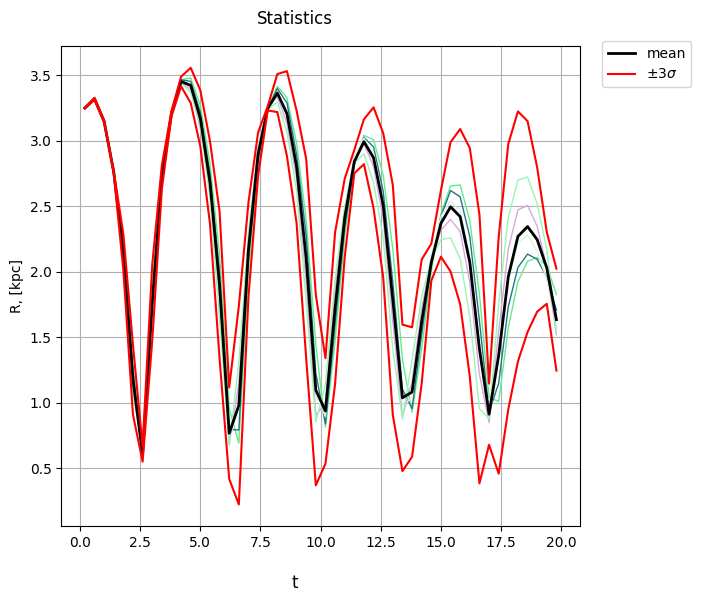

In [5]:
db.show_statistics()

By default, it plots +-3 standard deviation boundary.

To plot for another number of standard deviations, for example for 5std, specify n_std = 5

It is possible to style area between standard deviation boundaries:\
by `std_area` = True fill area with color\
by `std_lines` = False - remove lines of the boundary:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


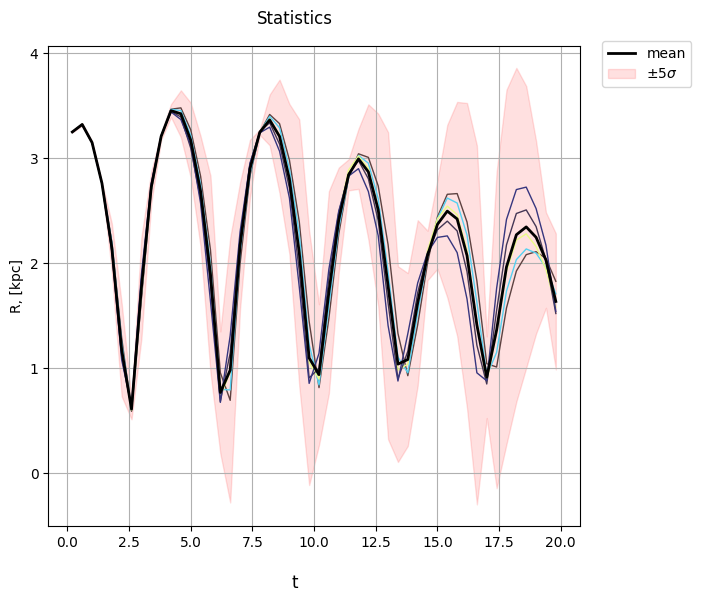

In [6]:
db.show_statistics(n_std = 5, std_area = True, std_lines = False)

If parameter `return_fig` = True, then the output is matplotlib.Figure and matplotlib.Axes objects. They may be used for futher plotting or plots may be changed using standard matplotlib methods.

For example, to remove the lower line of the sigma boundary:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


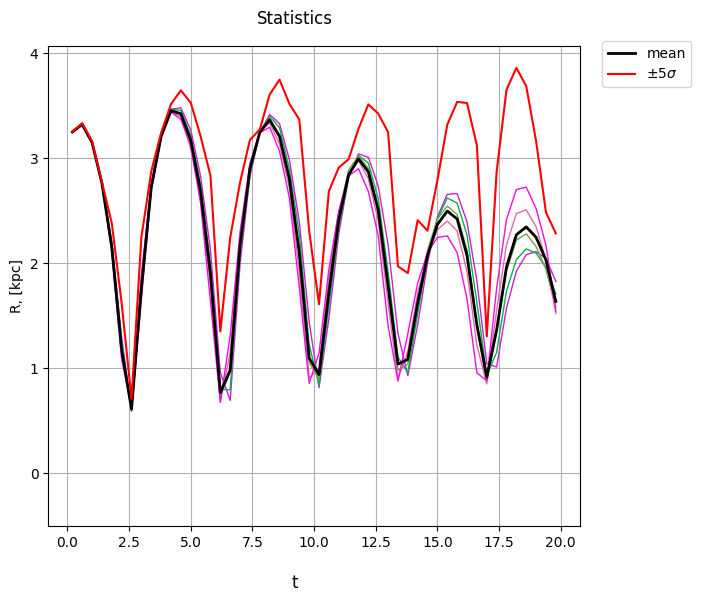

In [7]:
fig, ax = db.show_statistics(n_std = 5, return_fig = True)
ax[0].lines[-1].remove()

Previously, statistics was calculated and plotted for one column. To apply for several columns at once (to vector):

mean values:
             xg        yg         z
t_id                              
0    -3.140160 -0.703531  1.329168
1    -3.106403 -0.886055  1.499402
2    -2.856621 -1.004795  1.471706
3    -2.376338 -1.041127  1.226583
4    -1.594490 -0.936302  0.732682
standard deviation:
             xg        yg         z
t_id                              
0     0.056130  0.199743  0.213590
1     0.219066  0.135967  0.049007
2     0.419703  0.064630  0.190007
3     0.651066  0.047464  0.409149
4     1.002710  0.241422  0.665674
covariance matrix:
 t_id
0    [[0.003150617260189235, 0.0003319656312841116,...
1    [[0.047990038966932574, -0.02786669418772202, ...
2    [[0.176150484080281, -0.024494816030573286, -0...
3    [[0.4238871595540888, 0.026097168328297567, -0...
4    [[1.0054272247708318, 0.23776858418996263, -0....
Name: covar_matrix, dtype: object


/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


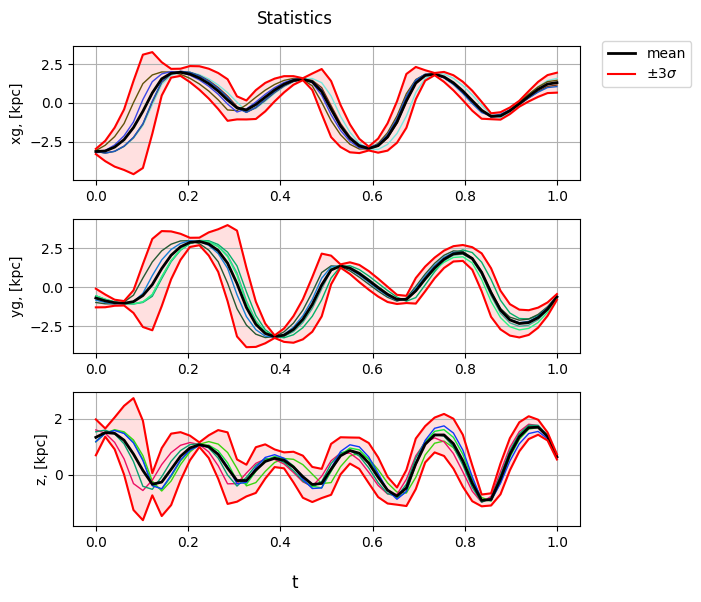

In [8]:
df_3 = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[9]', 'data.data[10]', 'data.data[5]'])
df_3.rename({'data.data[0]': 't', 'data.data[9]': 'xg', 'data.data[10]': 'yg', 'data.data[5]': 'z'}, axis = 1, inplace = True)
dataset_3 = analysis.CitrosData(df_3, data_label=['xg', 'yg', 'z'], units = 'kpc')

# set an independent variable as 't' by label by `param_label`:
db_3 = dataset_3.bin_data(n_bins = 50, param_label = 't')
#or
db_3 = dataset_3.scale_data(n_points = 50, param_label = 't')

# get the statistics:
stat_3 = db_3.get_statistics(return_format = 'citrosStat')

#`stat` now contains 3 attributes:
#the mean values (type - pandas.DataFrame):
print('mean values:\n', stat_3.mean.head(5))

#the standard deviation (type - pandas.DataFrame):
print('standard deviation:\n', stat_3.std.head(5))

#the covariance matrix (type - pandas.Series):
print('covariance matrix:\n', stat_3.covar_matrix.head(5))

db_3.show_statistics(std_area = True, std_lines = True)

### Correlation

Plot correlation plot for the exact index by `show_correlation()` method.

For example, to show correlation between two columns, 'xg' and 'yg'
for index `slice_id` = 10 and plot 1-,2- and 3-sigma intevals:

slice_id = 10,
slice_val = 0.2040816326530612


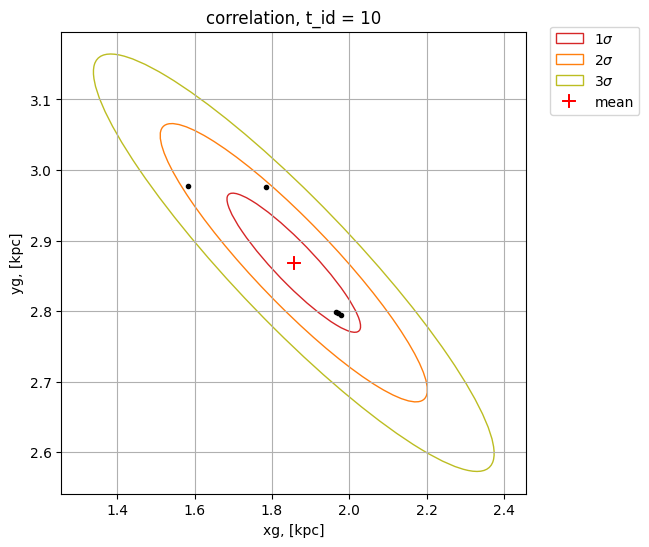

In [9]:
db_3.show_correlation(x_col = 'xg',
                      y_col = 'yg',
                      slice_id = 10,
                      n_std = [1,2,3])

If the index number is unknown, `slice_value` parameter may be used to define the approximate value.

The nearest to this value index will be set as `slice_id`:

slice_id = 49,
slice_val = 1.0


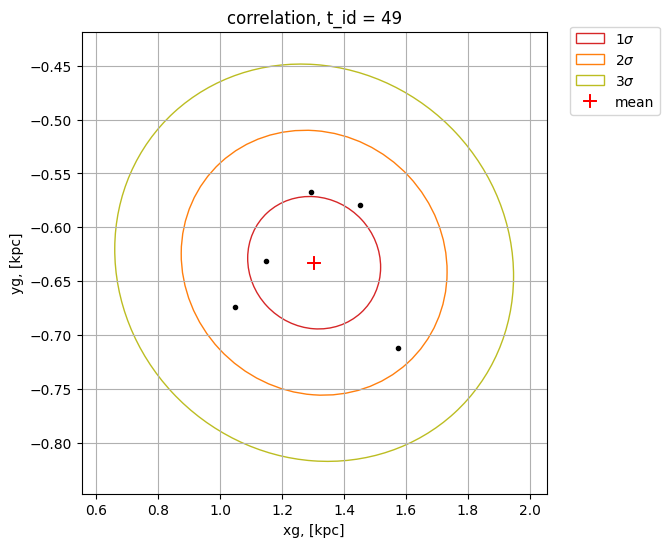

In [10]:
db_3.show_correlation(x_col = 'xg', y_col = 'yg',
                      slice_val = 15, n_std = [1,2,3])

To add bounding error to the plot, set `bounding_error` = True:

slice_id = 5,
slice_val = 0.1020408163265306


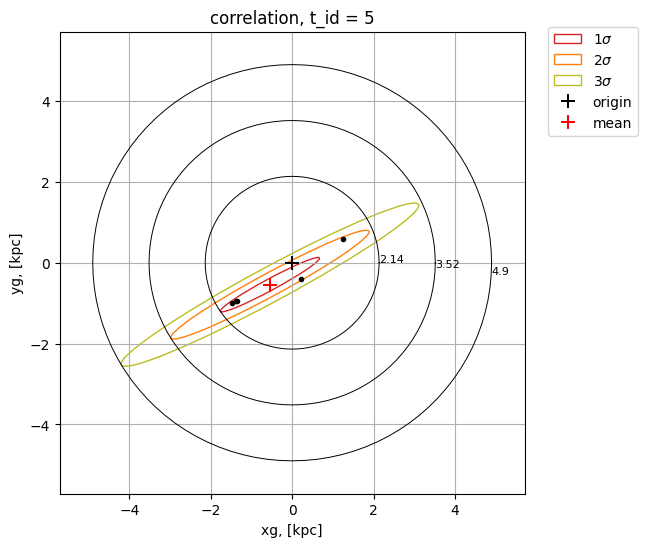

In [11]:
db_3.show_correlation(x_col = 'xg', y_col = 'yg',
                      slice_val = 0.1, n_std = [1,2,3],
                      bounding_error = True)

Return the parameters of the error ellipse by `return_ellipse_param` = True and print them:

slice_id = 5,
slice_val = 0.1020408163265306
ellipse parameters:
center: -0.5470049231157933, -0.5429938363346706
width: 8.309234266397262, height: 0.8528825987509969
angle: 28.522355990294095



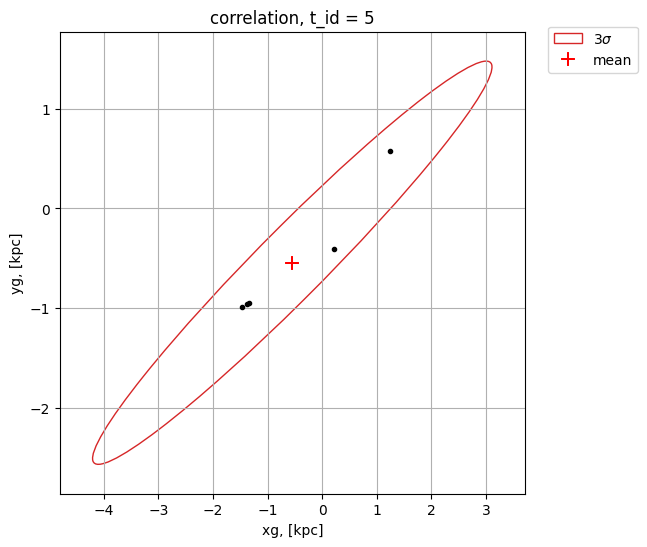

In [12]:
ellipse_param = db_3.show_correlation(x_col = 'xg', y_col = 'yg',
                                      slice_val = 0.1, n_std = 3,
                                      return_ellipse_param= True)

print("ellipse parameters:")
print(f"center: {ellipse_param['x']}, {ellipse_param['y']}")
print(f"width: {ellipse_param['width']}, height: {ellipse_param['height']}")
print(f"angle: {ellipse_param['alpha']}\n")

If `bounding_error` = True, then its radius also may be printed:

slice_id = 5,
slice_val = 0.1020408163265306
radius of the error circle: 4.8993151307546965



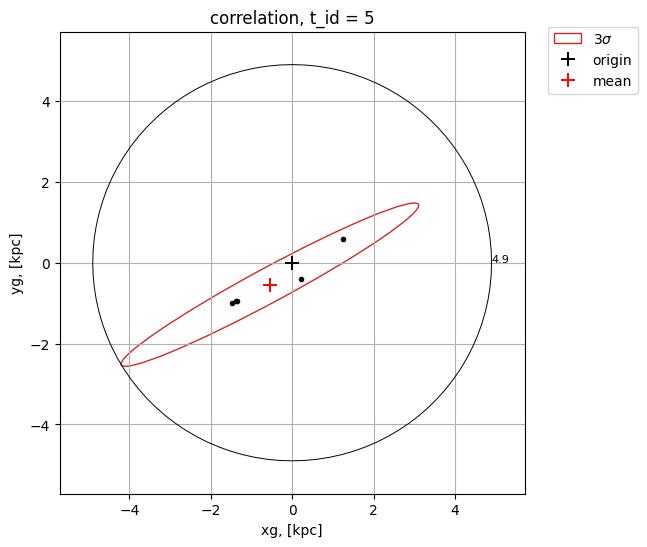

In [13]:
ellipse_param = db_3.show_correlation(x_col = 'xg', y_col = 'yg',
                                      slice_val = 0.1, n_std = 3,
                                      return_ellipse_param= True,
                                      bounding_error = True)

print(f"radius of the error circle: {ellipse_param['bounding_error']}\n")

### Regressions

Different input parameters may vary the output, and to predict how the parameter affects the result, regressions are used.
By now, three methods of regression are supported:
polynomial regression ('poly'), simple neural net regression ('neural_net') and gaussian mixture model ('gmm').

If there are different simulation and data of each of them was simulated under different parameters,
then we can try to predict the data values for the new parameter.
To make a prediction CitrosDataArray is used, that stores CitrosData objects of different parameter values.

Current simulation was performed for five values of the parameter M_disc - mass of the Galactic disk. Let's get the values and corresponding sid from the topic '\config' and make a dict with keys - sids and values - M_disc:

In [14]:
M_dict = dict(citros.batch('galactic orbits_1').topic('/config').get_unique_values(['sid', 'data.gal_orbits.ros__parameters.M_disc']))
M_dict

{0: 95.0, 1: 97.5, 2: 100.0, 3: 102.5, 4: 105.0}

Let's find prediction for the M_disc = 107.5 for the relation 'the total energy E' vs. 't'.

In [15]:
# Create CitrosDataArray object:

db_array = analysis.CitrosDataArray()


# Query data for each of the M parameter, assign indexes over 'data.time' axis to set
# correspondence between different simulations and pass the result to CitrosDataArray that we created:

for s, m in M_dict.items():
    #query data. The total energy is 'data.data[7]', time t - 'data.data[0]':
    df = citros.batch('galactic orbits_1').topic('/gal_orbits').sid(s).data(['data.data[0]', 'data.data[7]'])
    df.rename({'data.data[0]': 't', 'data.data[7]': 'E'}, axis = 1, inplace = True)

    #create CitrosData object and set M_dict value as a parameter.
    dataset = analysis.CitrosData(df,  
                                data_label = 'E',
                                parameters = {'M': m})

    #let's use bin() method of the label assignment:
    db = dataset.bin_data(n_bins = 50, param_label = 't', show_fig = False)

    #store in CitrosDataArray by add_db() method
    db_array.add_db(db)

Define the method of prediction, for example 'poly' and 'neural_net' and calculate prediction  for total energy E for the parameter M_disc = 107.5:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data_array.py:494: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


          t          E
0  0.482027 -18.875315
1  0.876330 -18.827679
2  1.270632 -18.789856
3  1.664935 -18.683255
4  2.059237 -18.621531


/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data_array.py:494: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


          t          E
0  0.482027 -18.865651
1  0.876330 -18.820402
2  1.270632 -18.783995
3  1.664935 -18.673251
4  2.059237 -18.718420


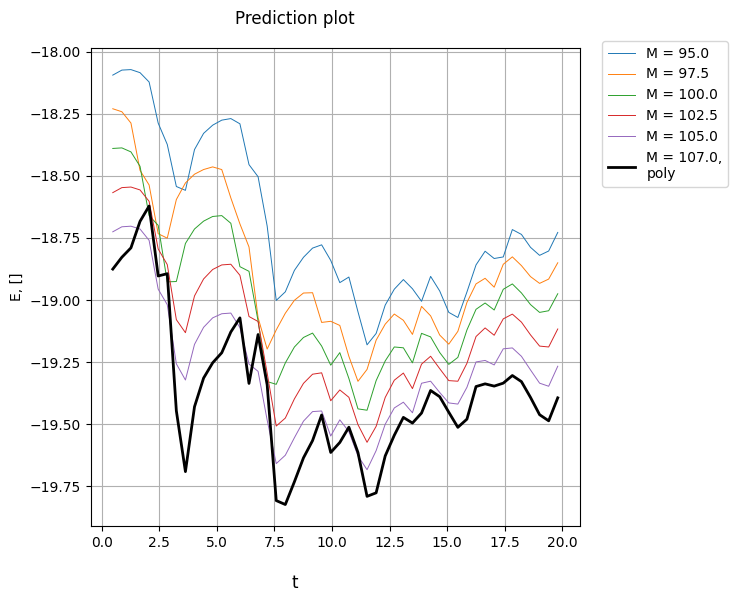

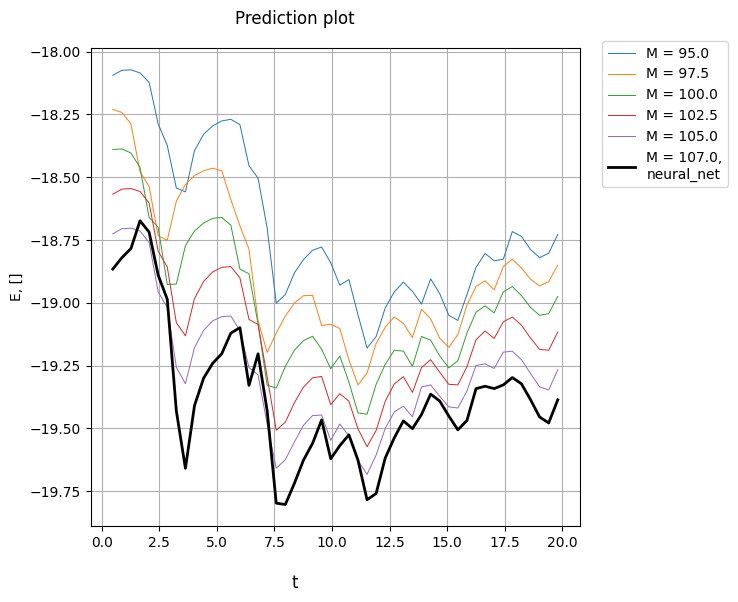

In [16]:
M0 = 107.0

# predict_method = 'poly'
result = db_array.get_prediction(parameters = {'M': M0},
                                method = 'poly', 
                                n_poly = 2,
                                show_fig = True)

print(result.head(5))



# predict_method == 'neural_net':

result = db_array.get_prediction(parameters = {'M': M0}, 
                                    method = 'neural_net',
                                    activation='tanh', max_iter = 200, solver='lbfgs',
                                    hidden_layer_sizes = (15,), random_state = 9,
                                    show_fig = True)

print(result.head(5))

Add references to the all batches that were used in the current notebook:

In [17]:
ref = da.Ref()
ref.print()

REFERENCES:

yalyalieva lidia, lidia@lulav.space
galactic orbits_1, 'return_next_val_func', 2023-10-01 08:26:57
https://citros.io/gal_orbits/batch/3c89af7d-3dee-48d2-9a19-8201c6030346/

